In [15]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, data_home="./data/", as_frame=False)  

In [16]:
print(mnist)

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object), 'frame': None, 'categories': {}, 'feature_names': ['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', '

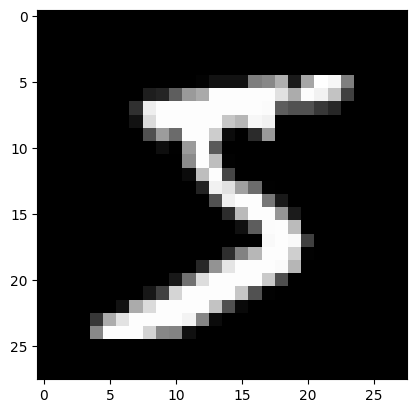

In [18]:
# データの前処理
import matplotlib.pyplot as plt
%matplotlib inline

X = mnist.data / 255
y = mnist.target

plt.imshow(X[0].reshape(28, 28), cmap="gray")

In [31]:
import torch
import numpy as np
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

y = y.astype(np.uint8)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=0)
X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)
loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)

In [33]:
from torch import nn

model = nn.Sequential()
model.add_module("fc1", nn.Linear(28*28*1, 100))
model.add_module("relu1", nn.ReLU())
model.add_module("fc2", nn.Linear(100, 100))
model.add_module("relu2", nn.ReLU())
model.add_module("fc3", nn.Linear(100, 10))

print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [37]:
from torch import optim
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [42]:
def train(epoch):
    model.train()
    for data, targets, in loader_train:
        optimizer.zero_grad()
        outputs = model(data)
        loss = loss_fn(outputs, targets)
        loss.backward()
        optimizer.step()
    print(f"epoch{epoch}: fin")
    
def test():
    model.eval()
    correct = 0
    with torch.no_grad():
        for data, targets in loader_test:
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            correct += predicted.eq(targets.data.view_as(predicted)).sum()
    data_num = len(loader_test.dataset)
    print(f"correct rate: {correct} / {data_num} ({100.0*correct/data_num})")

In [43]:
test()

correct rate: 1315 / 10000 (13.149999618530273)


In [44]:
for epoch in range(3):
    train(epoch)
test()

epoch0: fin
epoch1: fin
epoch2: fin
correct rate: 9623 / 10000 (96.2300033569336)
